<a href="https://colab.research.google.com/github/9-coding/Computer_Vision/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Computer_Vision/Lab03'

keypoint: 413 descriptor: (413, 128)
[[  1.   1.   1. ...   0.   0.   1.]
 [  8.  24.   0. ...   1.   0.   4.]
 [  0.   0.   0. ...   0.   0.   2.]
 ...
 [  1.   8.  71. ...  73. 127.   3.]
 [ 35.   2.   7. ...   0.   0.   9.]
 [ 36.  34.   3. ...   0.   0.   1.]]


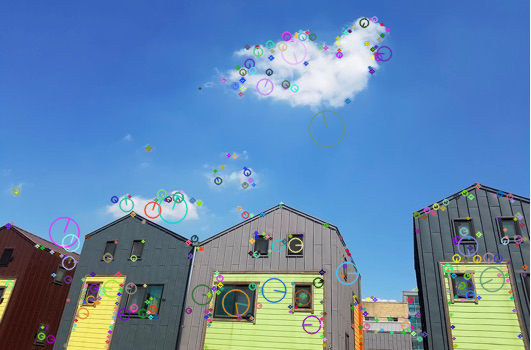

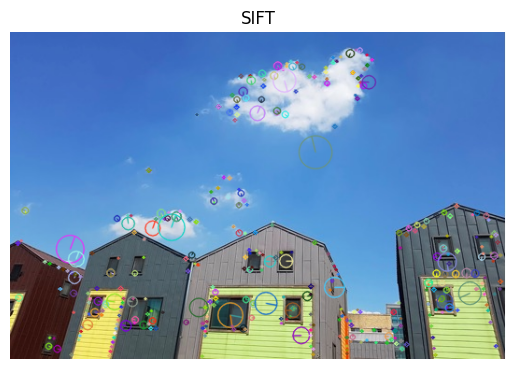

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(file_path + '/image_set/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()

"""
detector = cv2.xfeatures2d.SIIFT_create(nfeatures, nOctaveLayers. contrastThreshold, edgeThreshold, sigma)
- nfeatures         : 검출 최대 특징 수
- nOctaveLayers     : 이미지 피라미드에 사용할 계층 수
- contrastThreshold : 필터링할 빈약한 특징 문턱 값
- edgeThreshold     : 필터링할 엣지 문턱 값
- sigma             : 이미지 피라미드 0 계층에서 사용할 가우시안 필터의 시그마 값
"""

keypoints, descriptor = sift.detectAndCompute(gray, None)
print('keypoint:', len(keypoints), 'descriptor:', descriptor.shape)
print(descriptor)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# print (cv2)
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

# print (matplot)
b, g, r = cv2.split(img_draw)
img_RGB = cv2.merge([r, g, b])
plt.imshow(img_RGB)
plt.axis("off")
plt.title("SIFT")
plt.show()

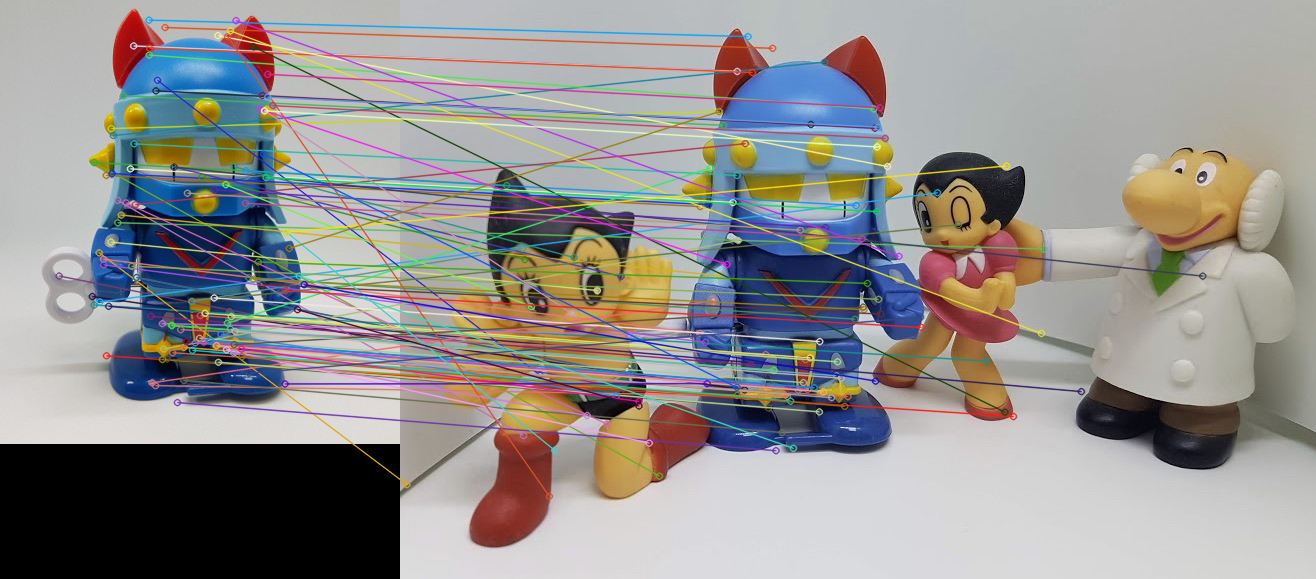

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img1 = cv2.imread(file_path + '/image_set/taekwonv1.jpg')
img2 = cv2.imread(file_path + '/image_set/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

"""
matcher = cv2.BFMatcher_create(normType. crossCheck)
- normType.  : 거리 측정 알고리즘 (cv2.NORM_L1. cv2.NORM_ .L2(default), CV2.NORM_L2SQR cv2.NORM_ ,HAMMING, CV2.NORM_HAMMING2)
- crosscheck : 상호 매칭이 되는 것만 반영 (default=False)
"""

matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# print (cv2)
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()